In [60]:
import numpy
import matplotlib

%matplotlib inline
import matplotlib.pyplot
matplotlib.rcParams['figure.facecolor'] = 'white'

In [61]:
# manual set param.
path = '/home/necst/data/experiments/logger/sisv_sweep/20181013_135429'

fixtime = 3
trimtime = 0.1 # triming

beam1 = '2l'
beam2 = '4l'

In [62]:
# auto set param.

title = 'nasco tuning (vsweep)'

beam = [beam1, beam2]

beam_list = ['2l', '2r', '3l', '3r',
                       '4l', '4r', '5l', '5r', 
                       '1lu', '1ll', '1ru', '1rl']

beam1_idx = beam_list.index(beam1)
beam2_idx = beam_list.index(beam2)
beam_idx = [beam1_idx, beam2_idx]

datatime_file = numpy.loadtxt(path + '/datatime.txt')
sis_vol_file = numpy.loadtxt(path + '/sis_vol.txt')
sis_cur_file = numpy.loadtxt( path + '/sis_cur.txt')
power_file = numpy.loadtxt( path + '/power.txt')

datatime = datatime_file
elapsed_time = datatime - datatime[0]

ncol = 2
nrow = 1
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 100
matplotlib.rcParams['font.size'] = 20

figsize = (ncol * 8, nrow * 8)

In [63]:
#  format data.

roop = int(elapsed_time[-1] / fixtime)

time = [elapsed_time[(i * fixtime + trimtime < elapsed_time)
                                        & (elapsed_time < (i + 1) * fixtime - trimtime)]
              for i in range(roop)]

sis_vol = [[sis_vol_file[:, beam][(i * fixtime + trimtime < elapsed_time) 
                                        & (elapsed_time < (i + 1) * fixtime - trimtime)]
                  for i in range(roop)] for beam in range(len(beam_list))]
sis_cur = [[sis_cur_file[:, beam][(i * fixtime + trimtime < elapsed_time) 
                                        & (elapsed_time < (i + 1) * fixtime - trimtime)]
                  for i in range(roop)] for beam in range(len(beam_list))]

power = [[power_file[:, beam][(i * fixtime + trimtime < elapsed_time) 
                                        & (elapsed_time < (i + 1) * fixtime - trimtime)]
                  for i in range(roop)] for beam in range(2)]

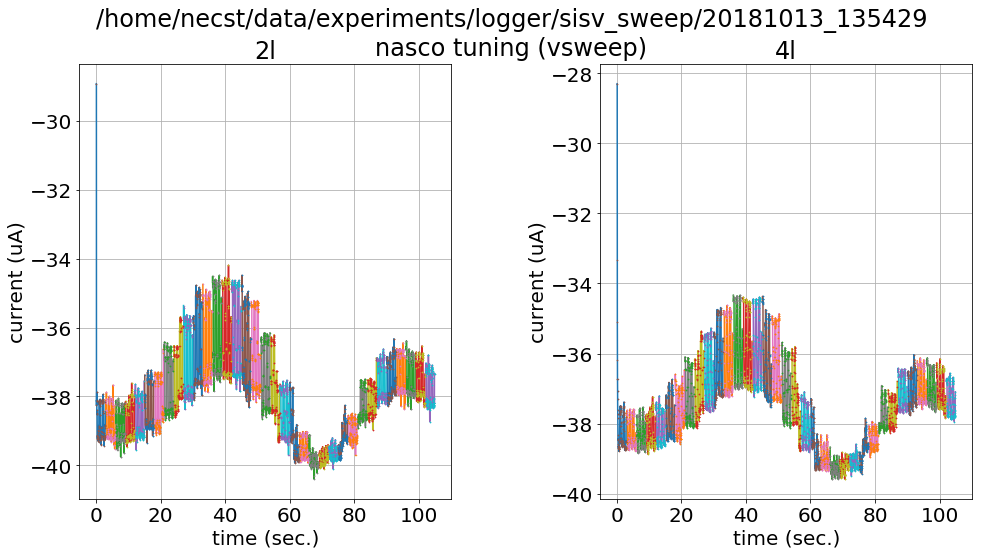

In [64]:
# check data.

matplotlib.rcParams['savefig.dpi'] = 500

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _beam, _ in zip(ax, beam, range(len(beam))):
    [_ax.plot(time[_roop], power[_][_roop]) for _roop in range(roop)]
    [_ax.plot(time[_roop], power[_][_roop], '.', markersize=1) for _roop in range(roop)]
    _ax.grid()
    _ax.set_xlabel('time (sec.)')
    _ax.set_ylabel('current (uA)')
    _ax.set_title('{}'.format(_beam))
    #_ax.set_ylim(-35,-20)
    
fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle(path + '\n{}'.format(title), size=24)

#matplotlib.pyplot.savefig('./check_data.png')
matplotlib.pyplot.show()

In [65]:
# calc param.

ave = 20
Thot = 300
Tcold = 77

power_sorted = [[numpy.array(sorted(_power)) for _power in power[i]] 
                                for i in range(len(power))]
hot = [numpy.array([numpy.mean(_power[- ave - 1:- 1]) for _power in power_sorted[i]])
             for i in range(len(power_sorted))]
cold= [numpy.array([numpy.mean(_power[0:ave + 1]) for _power in power_sorted[i]])
             for i in range(len(power_sorted))]

y = [_hot - _cold for _hot, _cold in zip(hot, cold)]
HOT = [10 ** (_hot / 10) for _hot in hot]
COLD = [10 ** (_cold / 10) for _cold in cold]
Y = [10 ** (_y / 10) for _y in y]
Trx = [(Tcold * _Y - Thot) / (1 - _Y) for _Y in Y]

voltage = [numpy.array([numpy.mean(_sis_vol) for _sis_vol in sis_vol[i]])
                    for i in range(len(beam_list))]
current = [numpy.array([numpy.mean(_sis_cur) for _sis_cur in sis_cur[i]])
                    for i in range(len(beam_list))]

/home/necst/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


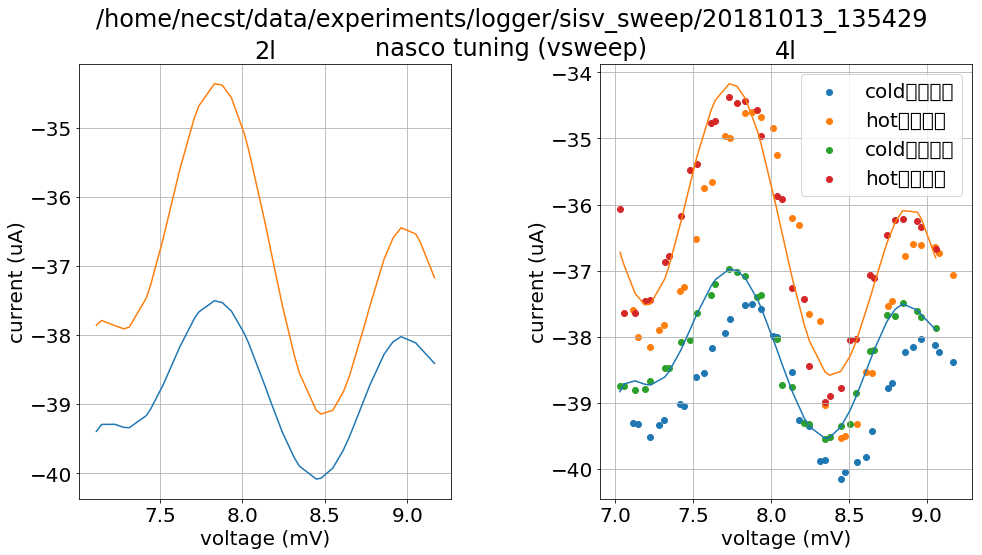

In [66]:
# plot hot / cold

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _beam, idx, _ in zip(ax, beam, beam_idx, range(len(beam))):
    res3=numpy.polyfit(voltage[idx], cold[_], 7)
    _res3=numpy.polyfit(voltage[idx], hot[_], 7)
    y3 = numpy.poly1d(res3)(voltage[idx])
    _y3 = numpy.poly1d(_res3)(voltage[idx])
    matplotlib.pyplot.scatter(voltage[idx],cold[_] , label='cold元データ')
    matplotlib.pyplot.scatter(voltage[idx],hot[_] , label='hot元データ')
    _ax.plot(voltage[idx], y3)
    _ax.plot(voltage[idx], _y3)
    _ax.grid()
    _ax.legend()
    _ax.set_xlabel('voltage (mV)')
    _ax.set_ylabel('current (uA)')
    _ax.set_title('{}'.format(_beam))
    
fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle(path + '\n{}'.format(title), size=24)

matplotlib.pyplot.savefig('./chopper_wheel.png')
matplotlib.pyplot.show()

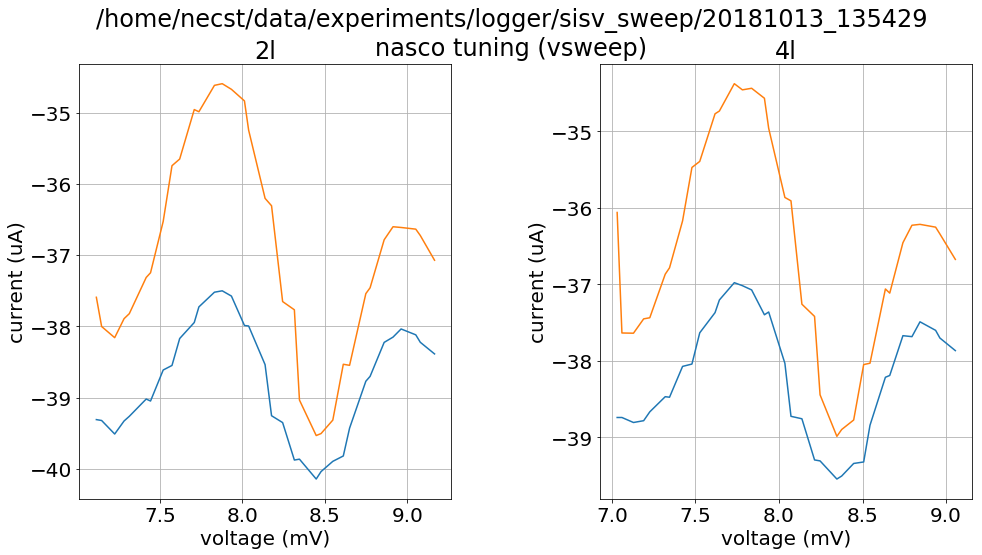

In [67]:
# plot hot / cold

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _beam, idx, _ in zip(ax, beam, beam_idx, range(len(beam))):
    _ax.plot(voltage[idx], cold[_])
    _ax.plot(voltage[idx], hot[_])
    _ax.grid()
    _ax.set_xlabel('voltage (mV)')
    _ax.set_ylabel('current (uA)')
    _ax.set_title('{}'.format(_beam))
    
fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle(path + '\n{}'.format(title), size=24)

matplotlib.pyplot.savefig('./chopper_wheel.png')
matplotlib.pyplot.show()

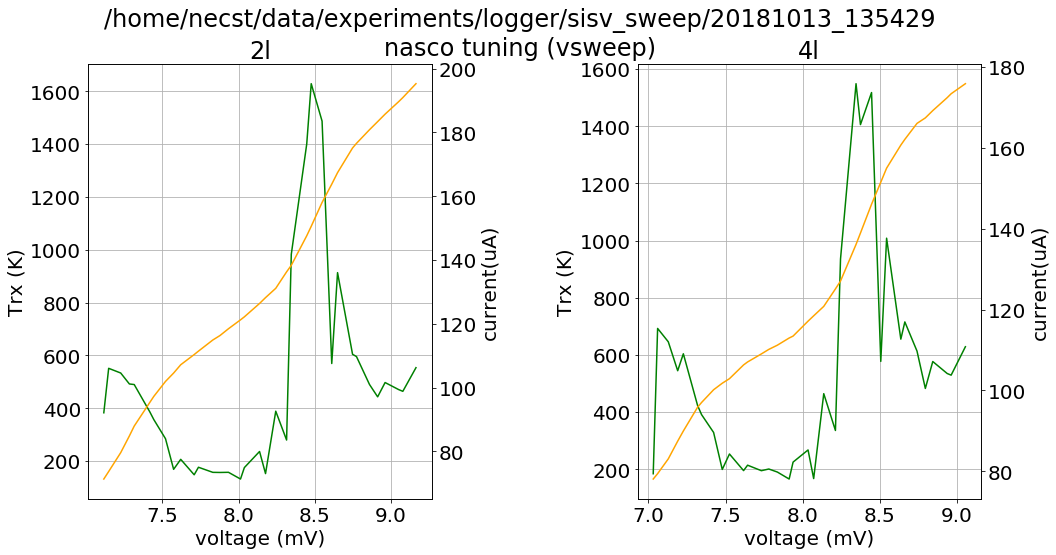

In [68]:
# plot hot / cold

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _beam, idx, _ in zip(ax, beam, beam_idx, range(len(beam))):
    _ax.plot(voltage[idx], Trx[_], c='green')
    _ax2 = _ax.twinx()    
    _ax2.plot(voltage[idx], current[idx], c='orange')    
    _ax.grid()
    _ax.set_xlabel('voltage (mV)')
    _ax.set_ylabel('Trx (K)')
    _ax2.set_ylabel('current(uA)')
    #_ax.set_ylim(0,200)
    _ax.set_title('{}'.format(_beam))
    
fig.subplots_adjust(wspace=0.6, hspace=0.6)
fig.suptitle(path + '\n{}'.format(title), size=24)

matplotlib.pyplot.savefig('./sisv_trx.png')
matplotlib.pyplot.show()

In [70]:
# get param.
minTrx_idx = [numpy.argmin(Trx[i]) for i in range(len(Trx))]
minTrx = [_Trx[idx] for _Trx, idx in zip(Trx, minTrx_idx)]
optimum_voltage = [voltage[idx][minTrx_idx[enu]] for enu, idx in enumerate(beam_idx)]
print('/--- Tuning param.\n\n'
          '[{beam1}] \n Voltage : {optimum_voltage[0]:.3f}mV, Trx : {minTrx[0]:.3f} \n\n'
          '[{beam2}] \n Voltage : {optimum_voltage[1]:.3f}mV, Trx : {minTrx[1]:.3f} \n\n'
          '/----------------------'.format(**locals()))

/--- Tuning param.

[2l] 
 Voltage : 8.012mV, Trx : 132.051 

[4l] 
 Voltage : 7.913mV, Trx : 165.489 

/----------------------
